In [ ]:
In questo esercizio sono state aggiunte due distribuzioni di probabilità: quella esponenziale e quella lorentziana. E' stato possibile
campionarle tramite l'inversione della loro funzione cumulativa.
Nei grafici è stato eseguito un fit gaussiano per la distribuzione uniforme di numeri casuali e la distribuzione esponenziale, coerentemente con quanto
affermato dal teorema del limite centrale. Si noti che la distribuzione lorentziana non rispetta le ipotesi del teorema del limite centrale (e dunque la tesi), poichè avente
varianza infinita. Per questo motivo non è stato eseguito un fit gaussiano su questa distribuzione.

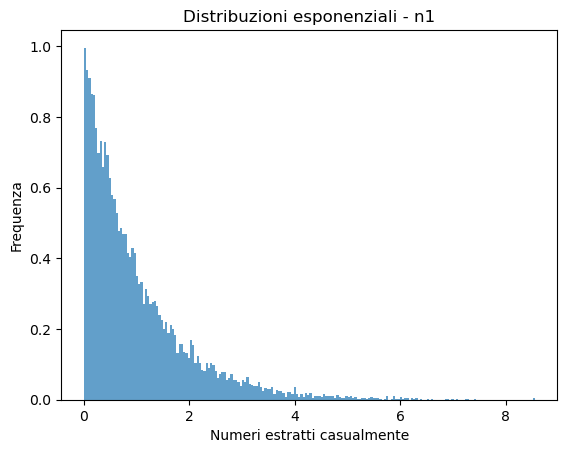

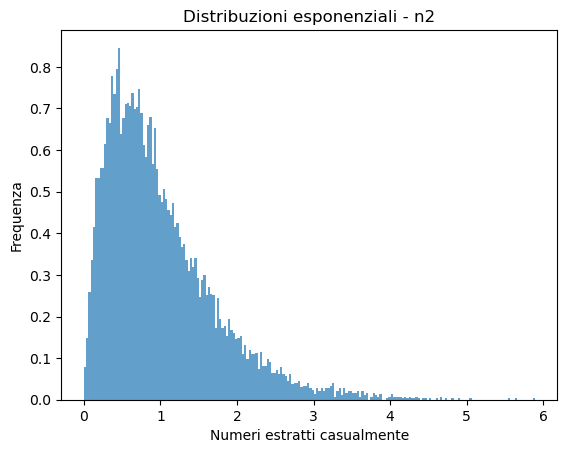

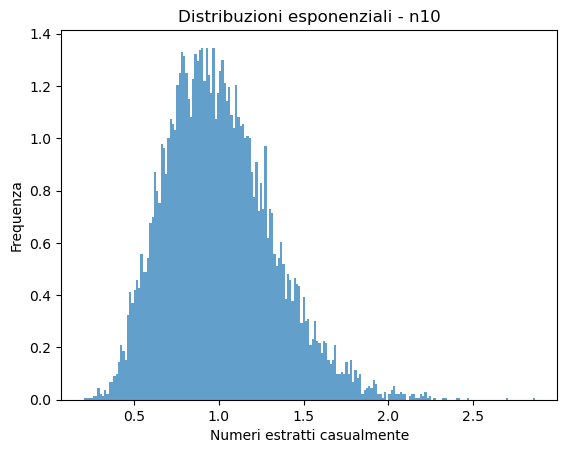

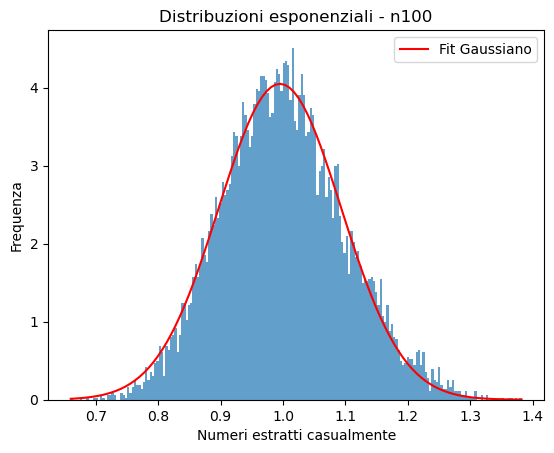

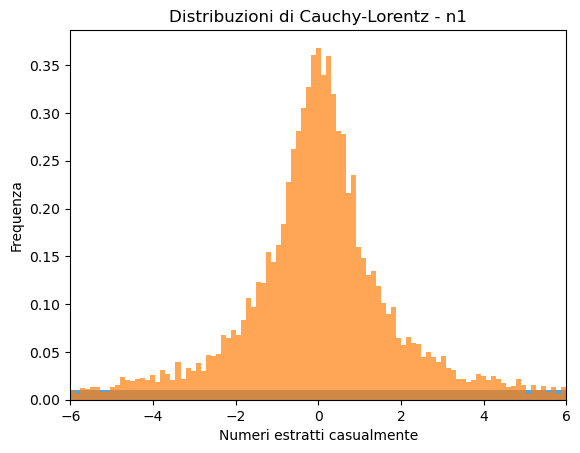

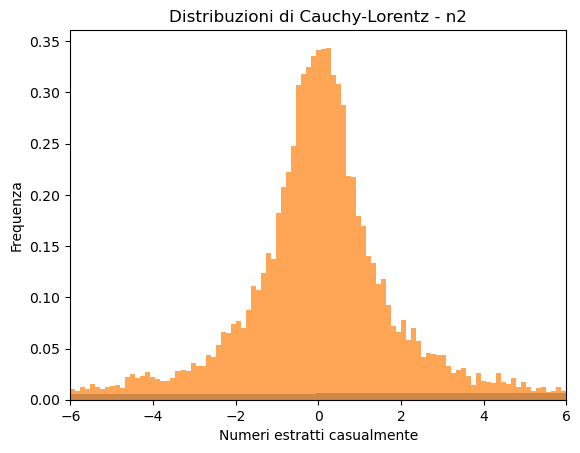

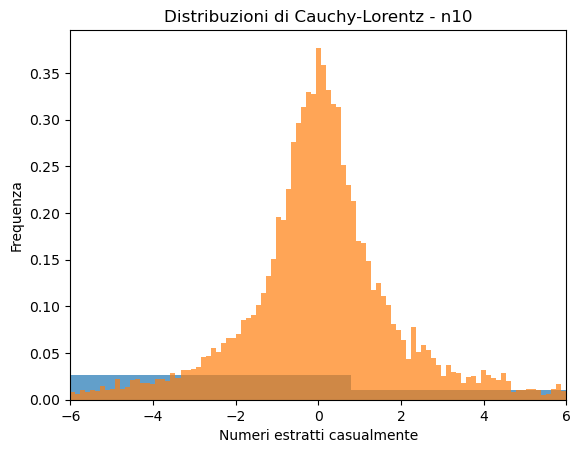

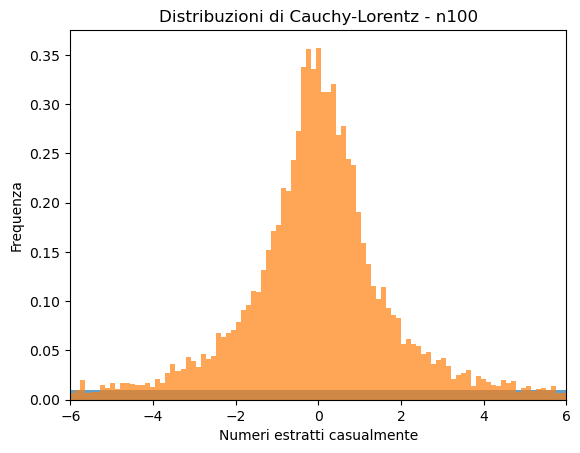

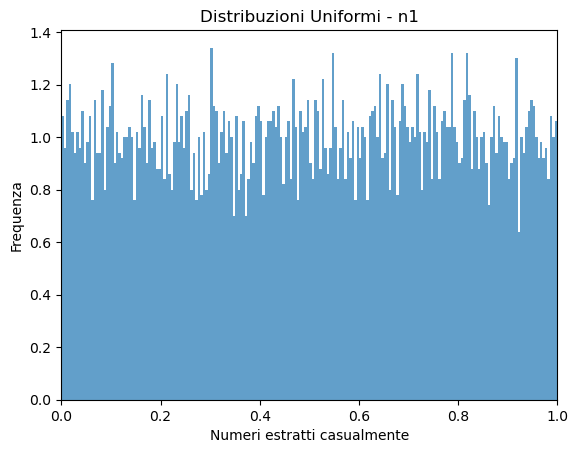

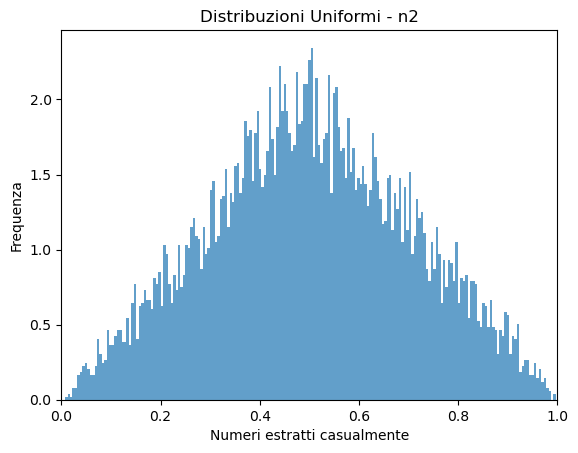

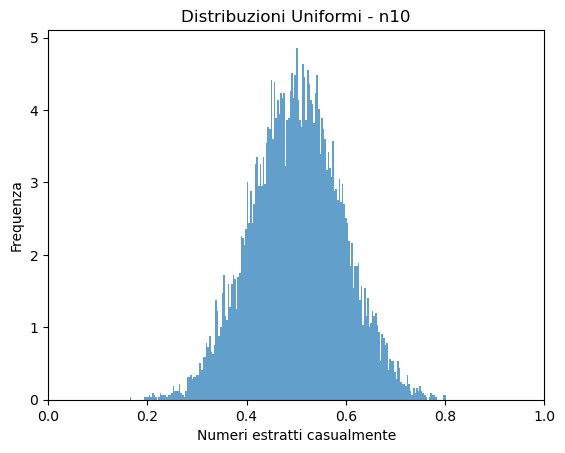

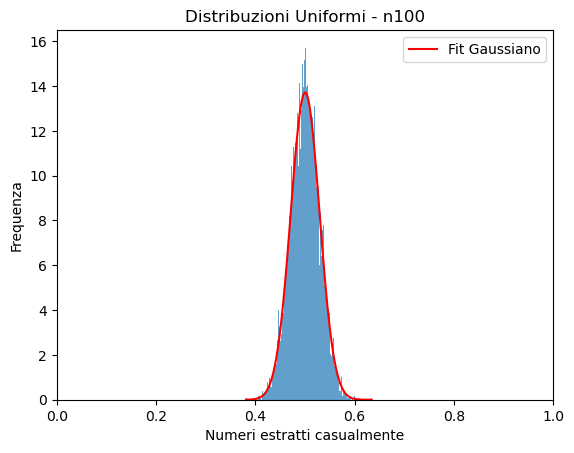

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def read_data_from_file(filename):
    medie_rannyu = []
    medie_exp = []
    medie_CL = []

    with open(filename, 'r') as file:
        # Ignora la prima riga (riga di intestazione)
        next(file)
        for line in file:
            values = line.split()
            medie_rannyu.append(float(values[0]))
            medie_exp.append(float(values[1]))
            medie_CL.append(float(values[2]))

    return medie_rannyu, medie_exp, medie_CL

medie_rannyu_n1, medie_exp_n1, medie_CL_n1 = read_data_from_file("n1.dat")
medie_rannyu_n2, medie_exp_n2, medie_CL_n2 = read_data_from_file("n2.dat")
medie_rannyu_n10, medie_exp_n10, medie_CL_n10 = read_data_from_file("n10.dat")
medie_rannyu_n100, medie_exp_n100, medie_CL_n100 = read_data_from_file("n100.dat")

medie_exp = [medie_exp_n1, medie_exp_n2, medie_exp_n10, medie_exp_n100]
medie_CL = [medie_CL_n1, medie_CL_n2, medie_CL_n10, medie_CL_n100]
medie_rannyu = [medie_rannyu_n1, medie_rannyu_n2, medie_rannyu_n10, medie_rannyu_n100]
labels = ['n1', 'n2', 'n10', 'n100']

# Definizione degli array per i bin personalizzati della distribuzione di Cauchy-Lorentz
x_cl = np.linspace(-6, 6, 10000)
bins_cl = np.linspace(-6, 6, 100)

for data, title in zip([medie_exp, medie_CL, medie_rannyu], ['Distribuzioni esponenziali', 'Distribuzioni di Cauchy-Lorentz', 'Distribuzioni Uniformi']):
    for medie, label in zip(data, labels):
        plt.figure()  
        plt.hist(medie, bins=200, density=True, alpha=0.7)  # Density=True per normalizzare l'istogramma
        plt.title(f'{title} - {label}')  
        plt.xlabel('Numeri estratti casualmente')  
        plt.ylabel('Frequenza')  
        if title == 'Distribuzioni Uniformi':  
            plt.xlim(0, 1)  
        if title == 'Distribuzioni di Cauchy-Lorentz': 
            plt.xlim(-6, 6)
            plt.hist(medie, bins=bins_cl, density=True, alpha=0.7)  # Utilizza i bin personalizzati per Cauchy-Lorentz
        
        if label == 'n100':
            # Definizione di una funzione di Gauss per il fit
            def gaussian(x, amplitude, mean, stddev):
                return amplitude * np.exp(-((x - mean) / stddev) ** 2 / 2)
            

            # Esegui il fit
            if title == 'Distribuzioni di Cauchy-Lorentz': 
                bins = bins_cl; 
            else:
                bins = 100;
            bins, edges = np.histogram(medie, bins=100, density=True)
            centers = (edges[:-1] + edges[1:]) / 2
            popt, pcov = curve_fit(gaussian, centers, bins, p0=[1, np.mean(medie), np.std(medie)])

            # Plot del fit sopra l'istogramma  
            if title == 'Distribuzioni di Cauchy-Lorentz': 
                x_fit = 0,
                y_fit = 0;
                
            else: 
                x_fit = np.linspace(min(medie), max(medie), 100)
                y_fit = gaussian(x_fit, *popt)
                plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')
                plt.legend()

plt.show()

